<a href="https://colab.research.google.com/github/yandexdataschool/MLatImperial2022/blob/main/Seminars/lab_02_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np

import matplotlib.pyplot as plt

# Сегодняшние данные

400 фотографий человеческих лиц. Каждое лицо представляет собой двумерный массив [64x64] яркости пикселей.

In [33]:
from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces().images

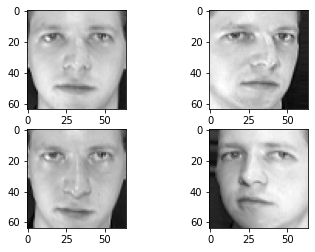

In [34]:
# этот код демонстрирует подзаголовки matplotlib. Синтаксис: plt.subplot(height(высота), width(ширина), index_starting_from_1)
plt.subplot(2,2,1)
plt.imshow(data[0],cmap='gray')
plt.subplot(2,2,2)
plt.imshow(data[1],cmap='gray')
plt.subplot(2,2,3)
plt.imshow(data[2],cmap='gray')
plt.subplot(2,2,4)
plt.imshow(data[3],cmap='gray')

# Проблема реконструкции лица


Решим задачу реконструкции лица: даны левые половины лиц __(X)__, наш алгоритм предскажет правую половину __(y)__. Наш первый шаг — нарезать фотографии на X и Y, используя срезы.

__Срезы в numpy:__
* В обычном питоне slice выглядит примерно так: `a[2:5]` _(выбрать элементы от 2 до 5)_
* Numpy позволяет разбивать N-мерные массивы по каждому измерению: [image_index(изображение_индекс), height(высота), width(ширина)]
  * `data[:10]` - Выберите первые 10 изображений
  * `data[:, :10]` - Для всех изображений выберите горизонтальную полосу высотой 10 пикселей в верхней части изображения.
  * `data[10:20, :, -25:-15]` - Возьмите изображения [10, 11, ..., 19], для каждого изображения выберите _vetrical stripe_ (_вертикальную полосу_) шириной 10 пикселей, на расстоянии 15 пикселей от _right_ side (_правой_ стороны).

__Ваше задание:__

Используйте фрагменты, чтобы выбрать все __left image halves as X__ (левые половинки изображения как X) и все __right halves as y__ (правые половинки изображения как y).

In [35]:
data.shape

(400, 64, 64)

In [36]:
# выберите левую половину каждой грани как X, правую половину как Y
X = data[:, :, :32]
y = data[:, :, 32:]

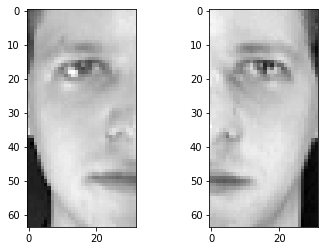

In [37]:
# Если вы все сделали правильно, вы увидите левое и правое полуизображения, нарисованные отдельно в естественном порядке.
plt.subplot(1,2,1)
plt.imshow(X[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(y[0],cmap='gray')

assert X.shape == y.shape == (len(data), 64, 32), "Пожалуйста, разрежьте ровно левую половину лица до X и правую половину лица до Y"

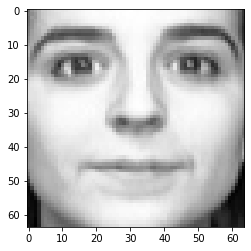

In [38]:
def glue(left_half,right_half):
    # объединить фотографии обратно вместе
    left_half = left_half.reshape([-1, 64, 32])
    right_half = right_half.reshape([-1, 64, 32])
    return np.concatenate([left_half, right_half], axis=-1)


# если вы все сделали правильно, вы увидите настоящее лицо
plt.imshow(glue(X, y)[99], cmap='gray')

# Линейная регрессия

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X.reshape([len(X), -1]),
                                                    y.reshape([len(y), -1]),
                                                    test_size=0.05, random_state=42)

print(X_test.shape)

(20, 2048)


In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

measure mean squared error

измерить среднеквадратичную ошибку

In [41]:
from sklearn.metrics import mean_squared_error

print("Train MSE:", mean_squared_error(Y_train, model.predict(X_train)))
print("Test MSE:", mean_squared_error(Y_test, model.predict(X_test)))

Train MSE: 3.2139174e-12
Test MSE: 0.010284164


## Почему ошибка поезда намного меньше, чем ошибка теста?

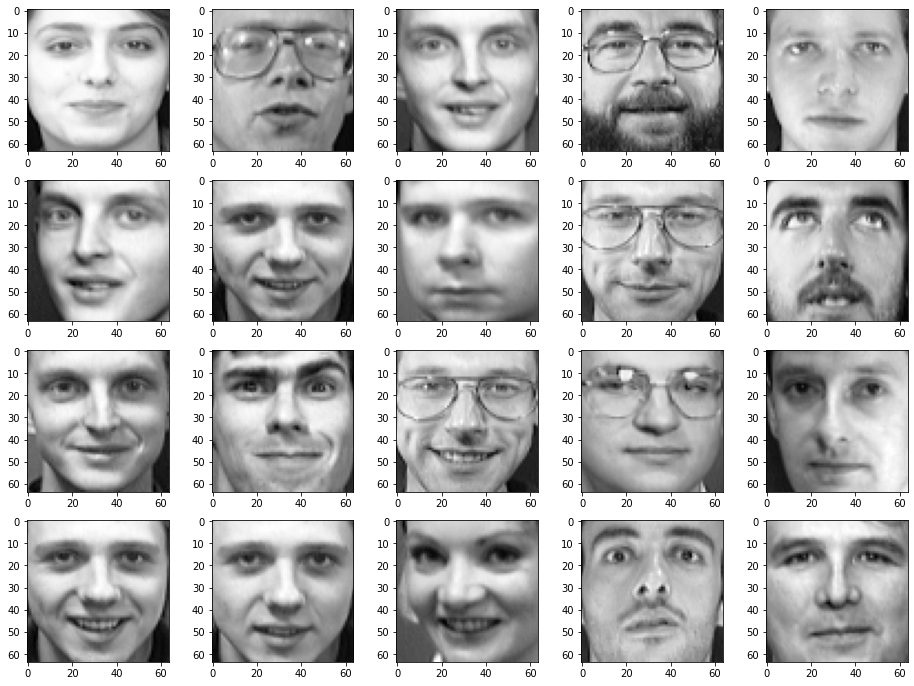

In [42]:
# Тренировочные прогнозы 
pics = glue(X_train,model.predict(X_train)) # реконструировать и склеить X и предсказанный Y для набора данных поезда

plt.figure(figsize=[16, 12])
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pics[i], cmap='gray')

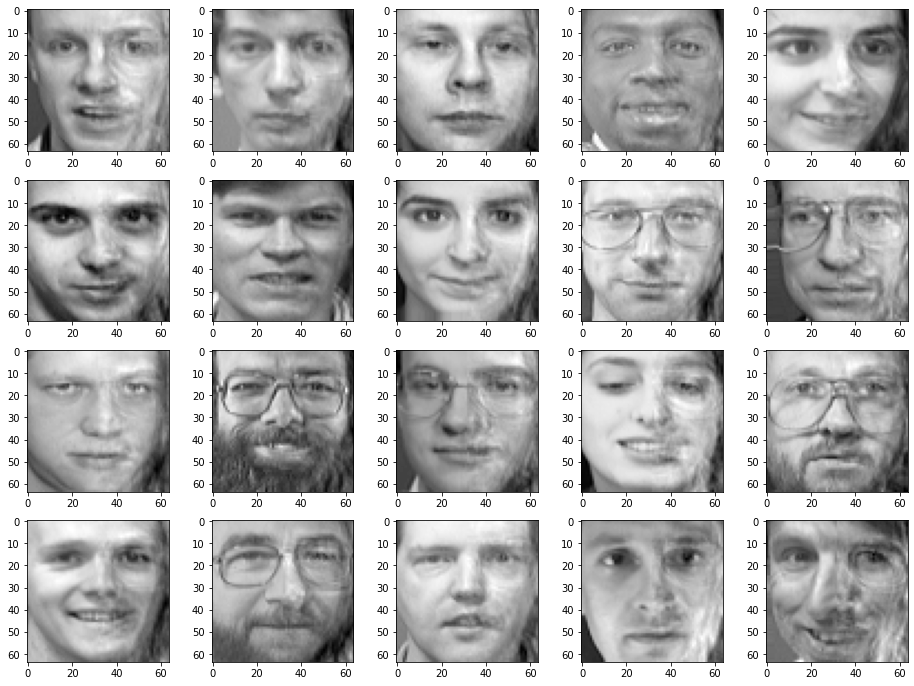

In [43]:
# Тестовые прогнозы
pics = glue(X_test,model.predict(X_test)) # реконструировать и склеить X и предсказанный Y для тестового набора данных

plt.figure(figsize=[16, 12])
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pics[i], cmap='gray')

### Регуляризация

В пакете sklearn много линейных моделей, и все их можно найти [here](https://scikitlearn.org/stable/modules/linear_model.html). Мы сосредоточимся на 3 из них: Ridge(ридж) регрессия, Lasso и ElasticNet.
Идея всех них очень проста: добавить некоторый штраф к целевой функции потерь, чтобы предотвратить переоснащение.

# Ридж регрессия
RidgeRegression — это просто LinearRegression с регуляризацией l2 — штрафуется за $ \alpha \cdot \sum _i w_i^2$

Давайте обучим такую модель с alpha=0.5

In [44]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.5)
ridge.fit(X_train, Y_train)

# ВАШ КОД: подогнать модель на тренировочном наборе> #подогнать модель на тренировочном наборе

Ridge(alpha=0.5)

In [45]:
# ВАШ КОД: прогнозируйте и измеряйте MSE при обучении и тестировании

print("Train MSE:", mean_squared_error(Y_train, ridge.predict(X_train)))
print("Test MSE:", mean_squared_error(Y_test, ridge.predict(X_test)))

Train MSE: 0.00042306157
Test MSE: 0.008029607


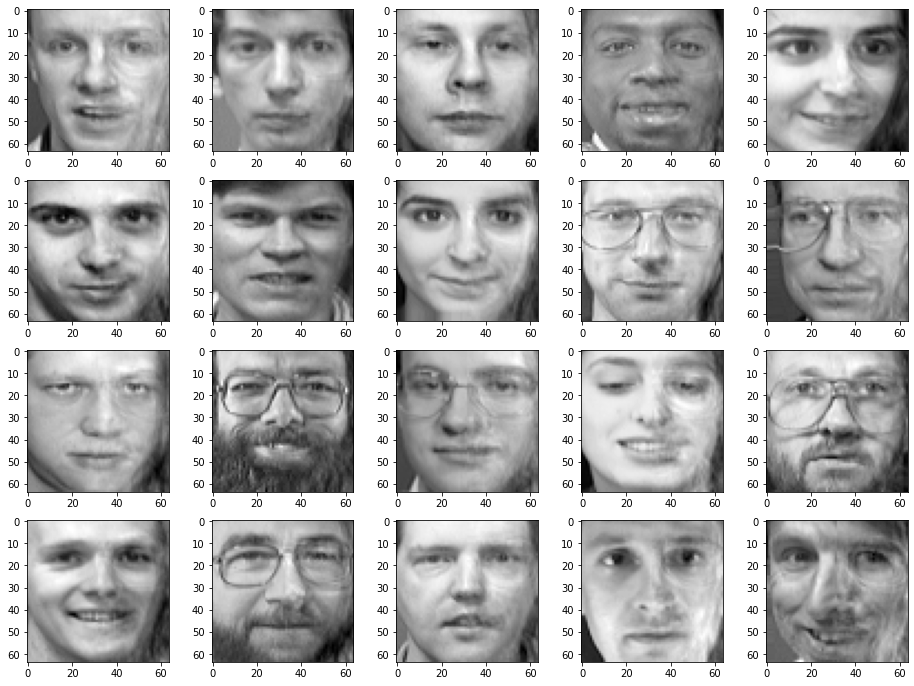

In [46]:
# Тестовые прогнозы
pics = glue(X_test,ridge.predict(X_test)) # реконструировать и склеить X и предсказанный Y для тестового набора данных

plt.figure(figsize=[16, 12])
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pics[i], cmap='gray')

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

# Поиск лучшего `alpha` (grid search - поиск по сетке)

`sklearn` имеет предварительно реализованный класс - `sklearn.model_selection.GridSearchCV` - который обертывает вашу модель и оптимизирует ее гиперпараметры с помощью перекрестной проверки в K-кратном размере. Значения гиперпараметров берутся из конечного набора значений в прямоугольной сетке (поэтому метод называется поиском по сетке). Чтобы использовать его, вам нужно установить сетку значений гиперпараметров, метрику, которую вы хотите оптимизировать, и количество кратностей перекрестной проверки.

In [47]:
from sklearn.model_selection import GridSearchCV

Fitting 5 folds for each of 13 candidates, totalling 65 fits


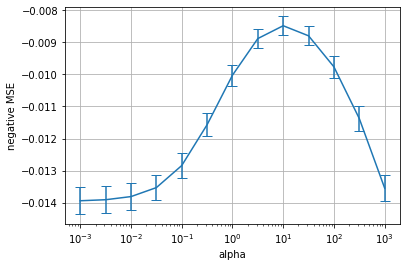

In [48]:
parameter_dict = {
    "alpha" : np.logspace(-3, 3, 13, base=10)
}

gscv = GridSearchCV(
    estimator=Ridge(), # наша модель для оптимизации
    param_grid=parameter_dict, # сетка значений параметров
    scoring='neg_mean_squared_error', # метрика - это должна быть оценка, поэтому
                                      # мы берем отрицательный MSE
    cv=5, verbose=2, n_jobs=-1
)
gscv.fit(X_train, Y_train)

plt.errorbar(gscv.param_grid['alpha'],
             gscv.cv_results_['mean_test_score'],
             gscv.cv_results_['std_test_score'] / gscv.cv**0.5,
             capsize=5)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("negative MSE")
plt.grid()

Теперь вы можете найти лучшую модель, как `gscv.best_estimator_`. Используйте его, чтобы снова сделать реконструкцию теста:

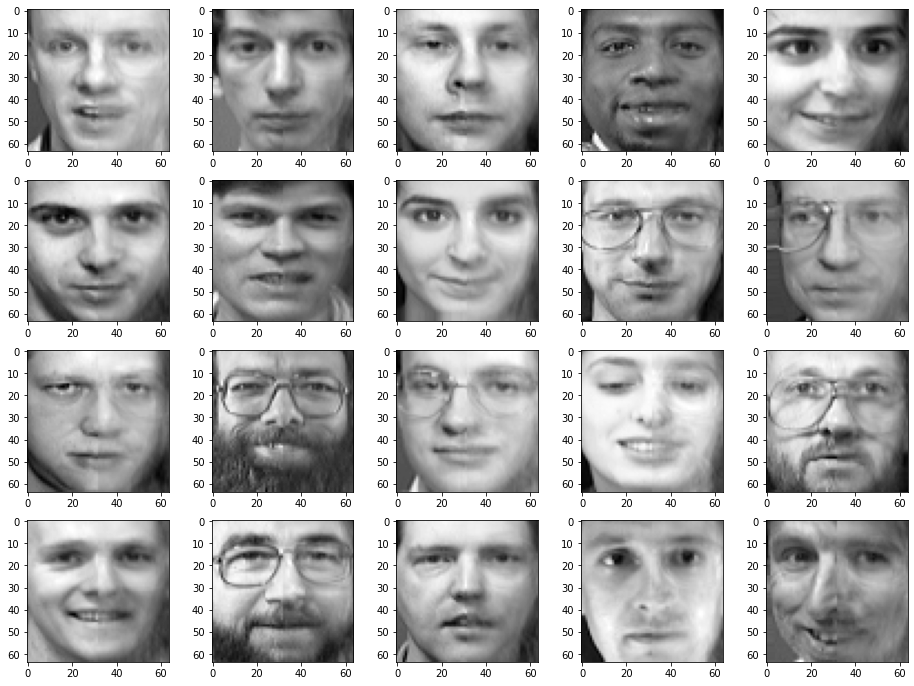

In [49]:
# Тестовые прогнозы
pics = glue(X_test, gscv.best_estimator_.predict(X_test))
plt.figure(figsize=[16, 12])
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pics[i], cmap='gray')

Fitting 5 folds for each of 13 candidates, totalling 65 fits


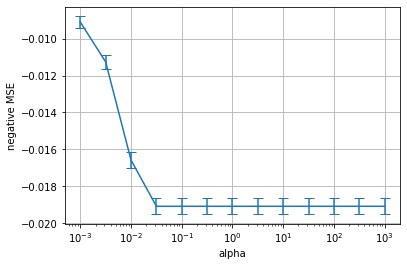

In [50]:
from sklearn.linear_model import Lasso, ElasticNet

#Используйте приведенный выше код для выполнения GridSearch для Lasso и/или ElasticNet.
# модели. Обратите внимание, что Lasso и ElasticNet *много*
# медленнее подходит, по сравнению с Ridge (особенно для малых альф).

parameter_dict = {
    "alpha" : np.logspace(-3, 3, 13, base=10)
}

gscv = GridSearchCV(
    estimator=Lasso(), # наша модель для оптимизации
    param_grid=parameter_dict, # сетка значений параметров
    scoring='neg_mean_squared_error', # метрика - это должна быть оценка, поэтому
                                      # мы берем отрицательный MSE
    cv=5, verbose=2, n_jobs=-1
)
gscv.fit(X_train, Y_train)

plt.errorbar(gscv.param_grid['alpha'],
             gscv.cv_results_['mean_test_score'],
             gscv.cv_results_['std_test_score'] / gscv.cv**0.5,
             capsize=5)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("negative MSE")
plt.grid()

Fitting 5 folds for each of 13 candidates, totalling 65 fits


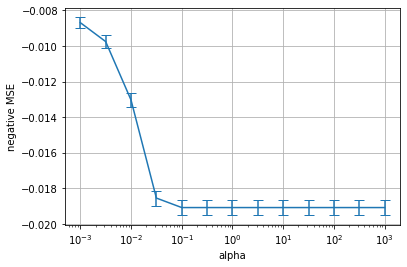

In [51]:
parameter_dict = {
    "alpha" : np.logspace(-3, 3, 13, base=10)
}

gscv = GridSearchCV(
    estimator=ElasticNet(), # наша модель для оптимизации
    param_grid=parameter_dict, # сетка значений параметров
    scoring='neg_mean_squared_error', # метрика - это должна быть оценка, поэтому
                                      # мы берем отрицательный MSE
    cv=5, verbose=2, n_jobs=-1
)
gscv.fit(X_train, Y_train)

plt.errorbar(gscv.param_grid['alpha'],
             gscv.cv_results_['mean_test_score'],
             gscv.cv_results_['std_test_score'] / gscv.cv**0.5,
             capsize=5)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("negative MSE")
plt.grid()

## Добавьте трансформаторы и сделайте конвейер

```python
some_transformer = sklearn.some_module.SomeTransformerClass(some_parameters) # создать объект-трансформер
some_transformer.fit(X, y) # научиться преобразовывать данные (например,
                           # для StandardScaler вычислить среднее значение и стандартное значение столбцов в X)
some_transformer.transform(X) # преобразовать признаки
```

In [131]:
#создать новую модель Ridge, используя конвейер с StandardScaler() и регрессией Ridge
#подгоните модель и напечатайте «Train MSE» и «Test MSE»

from sklearn.preprocessing import StandardScaler

transformer = StandardScaler()
transformer.fit(X_train)

transformer.transform(X_train)
transformer.transform(X_test)

array([[-1.1313555 , -1.0607283 , -0.64366823, ...,  0.2292423 ,
         0.39245388,  0.40670452],
       [-1.2003739 , -1.6289961 , -1.8525345 , ..., -1.2158093 ,
        -1.2831917 , -1.2433655 ],
       [ 0.59410256,  0.8844961 ,  0.7348635 , ...,  1.4016429 ,
         1.3924356 ,  1.1785114 ],
       ...,
       [-1.3154044 , -0.79845077, -0.367962  , ...,  0.17471193,
         0.23029466,  0.16717824],
       [ 0.2490108 ,  0.31622833,  0.2470753 , ...,  0.61095417,
         0.60866594,  0.59300256],
       [-1.3154044 , -1.1262976 , -0.89816654, ..., -1.5975211 ,
        -1.3912977 , -1.5095056 ]], dtype=float32)

In [132]:
from sklearn.pipeline import make_pipeline

model =  make_pipeline(StandardScaler(), Ridge(alpha = 10))
model.fit(X_train, Y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print("Train MSE:", mean_squared_error(Y_train, y_train_pred))
print("Test MSE:", mean_squared_error(Y_test, y_test_pred))

Train MSE: 0.016332287
Test MSE: 0.021798424


Этот конвейер можно использовать в резюме поиска по сетке, например:

Fitting 5 folds for each of 9 candidates, totalling 45 fits


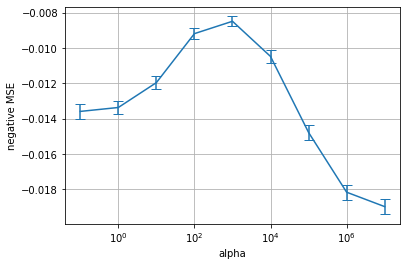

In [133]:
parameter_dict = {
    "ridge__alpha" : np.logspace(-1, 7, 9, base=10) # note the 'ridge__' prefix
                                                    # that tells to which step
                                                    # of the pipeline this
                                                    # parameter belongs
}

gscv = GridSearchCV(
    estimator=model,
    param_grid=parameter_dict,
    scoring='neg_mean_squared_error',
    cv=5, verbose=2, n_jobs=-1
)
gscv.fit(X_train, Y_train)


plt.errorbar(gscv.param_grid['ridge__alpha'],
             gscv.cv_results_['mean_test_score'],
             gscv.cv_results_['std_test_score'] / gscv.cv**0.5,
             capsize=5)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("negative MSE")
plt.grid()

Смотрите также:
- [sklearn.preprocessing.MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) - масштабирование на основе минимального и максимального значений функции
- [sklearn.preprocessing.RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) - масштабирование, которое игнорирует хвосты распределения признаков (более устойчиво к выбросам)
- [sklearn.preprocessing.OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) - однократное кодирование для категориальных функций
- [sklearn.preprocessing.FunctionTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html) - преобразование с использованием произвольной (например, определенной пользователем) функции Python
- [sklearn.compose.ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) - инструмент, который позволяет создавать сложные вложенные структуры преобразователей (например, для использования разных преобразователей для разных функций)
-[sklearn.compose.make_column_selector](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_selector.html) - инструмент для выбора столбцов с указанным типом данных

# Выбросы влияют на регрессию

Помните, что когда мы минимизируем потери
$$
MSE = (\hat y - y)^2
$$

которые штрафуют больше за более высокие значения ошибки. Как это повлияет на набор данных с выбросами, как вы думаете?

Вот пример регрессии, основанной на обычном LR и RANSAC, который итеративно обучается на случайных подвыборках данных, пытаясь выявить выбросы.

`class sklearn.linear_model.RANSACRegressor(base_estimator=None, *, min_samples=None, residual_threshold=None, is_data_valid=None, is_model_valid=None, max_trials=100, max_skips=inf, stop_n_inliers=inf, stop_score=inf, stop_probability=0.99, loss='absolute_error', random_state=None)`

Алгоритм регрессора RANSAC:
- Выберите случайные выборки min_samples из исходных данных и проверьте, является ли набор данных действительным (см. is_data_valid).

- Сопоставьте модель со случайным подмножеством (base_estimator.fit) и проверьте, действительна ли предполагаемая модель (см. is_model_valid).

- Классифицируйте все данные как выбросы или выбросы, вычислив остатки для оценочной модели (base_estimator.predict(X) - y)- все выборки данных с абсолютными остатками, меньшими или равными остаточному_порогу, считаются выбросами.

- Сохраните подогнанную модель как лучшую модель, если количество внутренних выборок максимально. В случае, если текущая оценочная модель имеет такое же количество вставок, она считается лучшей моделью только в том случае, если она имеет более высокий балл.

In [134]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model, datasets


n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

# Добавить выбросные данные
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Подгонка линии с использованием всех данных
lr = linear_model.LinearRegression()
lr.fit(X, y)

# Надежная линейная модель с алгоритмом RANSAC
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Прогнозировать данные оценочных моделей
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

# Сравните оценочные коэффициенты
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [54.17236387] [82.08533159]


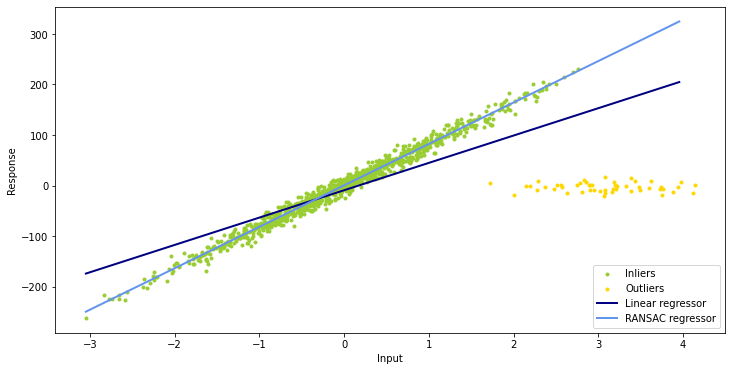

In [135]:
plt.figure(figsize=(12,6))
lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
            label='Outliers')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw,
         label='RANSAC regressor')
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

## Бонусная часть

Попробуйте использовать `sklearn.linear_model.SGDRegressor` с `huber` потеря в коде выше вместо `LinearRegression`. В этом случае лучше? Попробуйте изменить его `epsilon` параметр.

In [136]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model, datasets


n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

# Добавить выбросные данные
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Подгонка линии с использованием всех данных
sgd = linear_model.SGDRegressor(loss = 'huber', epsilon = 2)
sgd.fit(X, y)

# Надежная линейная модель с алгоритмом RANSAC
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Прогнозировать данные оценочных моделей
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = sgd.predict(line_X)
line_y_ransac = ransac.predict(line_X)

# Сравните оценочные коэффициенты
print("Estimated coefficients (true, SGDRegressor, RANSAC):")
print(coef, sgd.coef_, ransac.estimator_.coef_)

Estimated coefficients (true, SGDRegressor, RANSAC):
82.1903908407869 [79.98802189] [81.63462406]


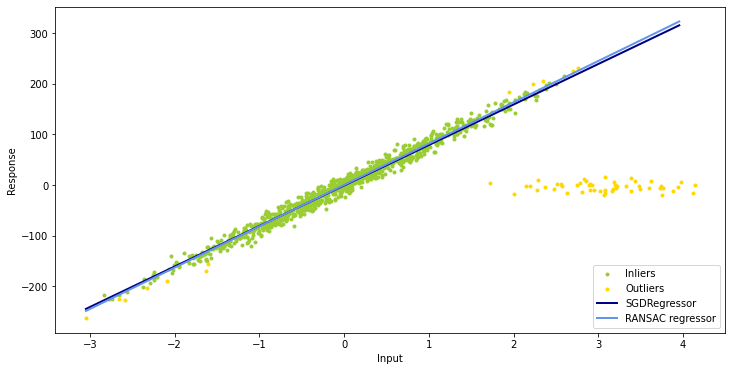

In [137]:
plt.figure(figsize=(12,6))
lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
            label='Outliers')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='SGDRegressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw,
         label='RANSAC regressor')
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()